In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
# Displaying first few rows
print(data.head(10))

         par_id                                          paragraph  \
0  4.282090e+11  Ramsay was born in Glasgow on 2 October 1852. ...   
1  5.642180e+11  It has been widely estimated for at least the ...   
2  2.914010e+11  He went on to win the Royal Medal of the Royal...   
3  3.154800e+10  The changes have altered many underlying assum...   
4  5.063401e+10  After these novels were published, Disraeli de...   
5  2.205200e+11  Philo also proposes that the order in nature m...   
6  6.360004e+09   This led to the AI spring of the early 2020s,...   
7  8.481190e+11  A second form of functionalism is based on the...   
8  4.927900e+10  The opposite of "moral" is "immoral", meaning ...   
9  7.922501e+10  Pepys' diary provides a first-hand account of ...   

                        has_entity  lexicon_count  difficult_words  \
0   ORG_YES_PRODUCT_NO_PERSON_YES_             49             12.0   
1    ORG_YES_PRODUCT_NO_PERSON_NO_            166             47.0   
2    ORG_YES_PRODUC

In [4]:
# Summary statistics
print(data.describe(include='all'))

              par_id                                          paragraph  \
count   9.220000e+03                                               9220   
unique           NaN                                               8967   
top              NaN  The theory is associated with Mencius and Wang...   
freq             NaN                                                  3   
mean    3.566324e+11                                                NaN   
std     3.221332e+11                                                NaN   
min     8.500328e+07                                                NaN   
25%     7.019601e+10                                                NaN   
50%     2.684380e+11                                                NaN   
75%     6.124310e+11                                                NaN   
max     1.058780e+12                                                NaN   

                            has_entity  lexicon_count  difficult_words  \
count                    

In [5]:
# Data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9220 entries, 0 to 9219
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9220 non-null   float64
 1   paragraph           9220 non-null   object 
 2   has_entity          9220 non-null   object 
 3   lexicon_count       9220 non-null   int64  
 4   difficult_words     9202 non-null   float64
 5   last_editor_gender  9220 non-null   object 
 6   category            9220 non-null   object 
 7   text_clarity        9 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 576.4+ KB
None


In [6]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 9220 rows and 8 columns.


In [12]:
# Checking for null values in each column
print(data.isnull().sum())



par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                 0
text_clarity          9211
paragraph_length         0
dtype: int64


In [13]:
# Checking for NaN values in each column
print(data.isna().sum())



par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                 0
text_clarity          9211
paragraph_length         0
dtype: int64


In [14]:
# Check ingfor any missing values 
print(data.isna().any())

par_id                False
paragraph             False
has_entity            False
lexicon_count         False
difficult_words        True
last_editor_gender    False
category              False
text_clarity           True
paragraph_length      False
dtype: bool


In [16]:
# Droping rows with any missing values
data1 = data.dropna()

# Verifying no missing values remain
print("\nData After Dropping Missing Values:")
print(data1.isna().sum())
print(data1.info())

print("\nCleaned Data:")
print(data1.head())


Data After Dropping Missing Values:
par_id                0
paragraph             0
has_entity            0
lexicon_count         0
difficult_words       0
last_editor_gender    0
category              0
text_clarity          0
paragraph_length      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9 non-null      float64
 1   paragraph           9 non-null      object 
 2   has_entity          9 non-null      object 
 3   lexicon_count       9 non-null      int64  
 4   difficult_words     9 non-null      float64
 5   last_editor_gender  9 non-null      object 
 6   category            9 non-null      object 
 7   text_clarity        9 non-null      object 
 8   paragraph_length    9 non-null      int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 720.0+ bytes
None

Cleaned Data:
         par_

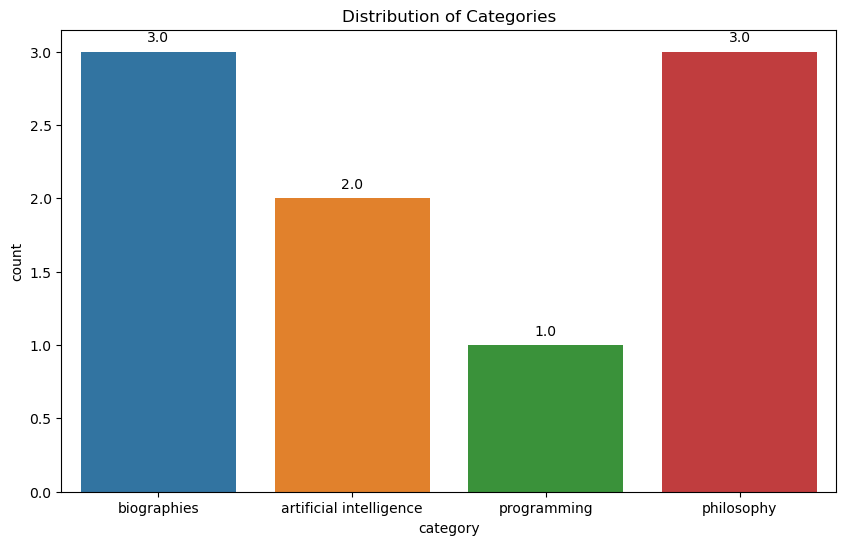

In [23]:
# Distribution of categories
plt.figure(figsize=(10, 6))
category_counts = data1['category'].value_counts()
ax = sns.countplot(data=data1, x='category')
plt.title('Distribution of Categories')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

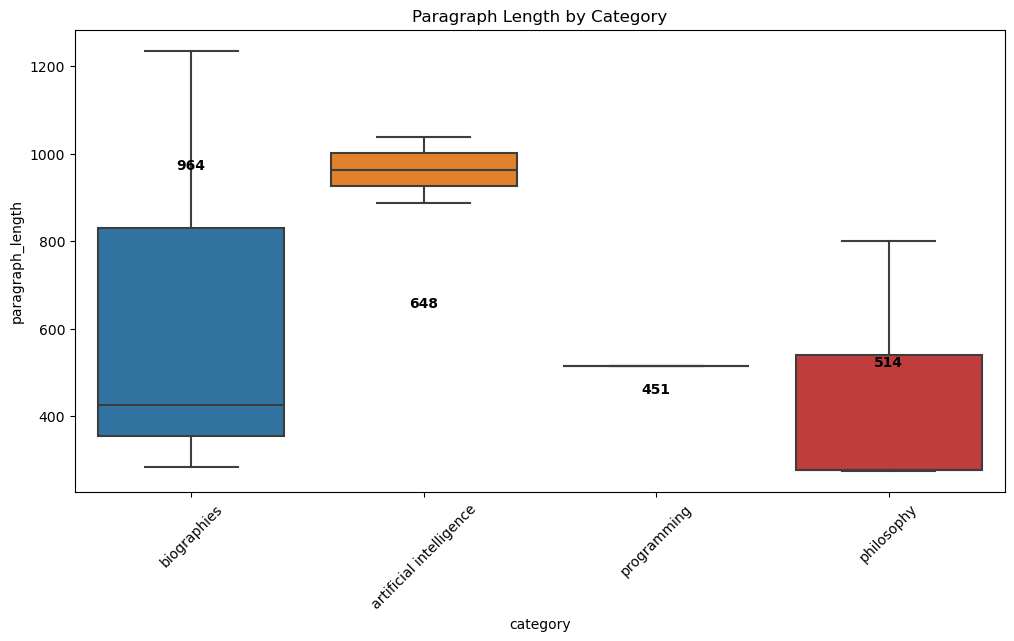

In [68]:
# Adding a column for paragraph length
data1['paragraph_length'] = data1['paragraph'].apply(len)

# Length of paragraphs by category
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=data1, x='category', y='paragraph_length')
plt.title('Paragraph Length by Category')
plt.xticks(rotation=45)

# Adding data labels for boxplot
category_means = data1.groupby('category')['paragraph_length'].mean()
for i, category in enumerate(category_means.index):
    plt.text(i, category_means[category], f'{category_means[category]:.0f}', 
             horizontalalignment='center', color='black', weight='semibold')

plt.show()

import warnings
warnings.filterwarnings("ignore")

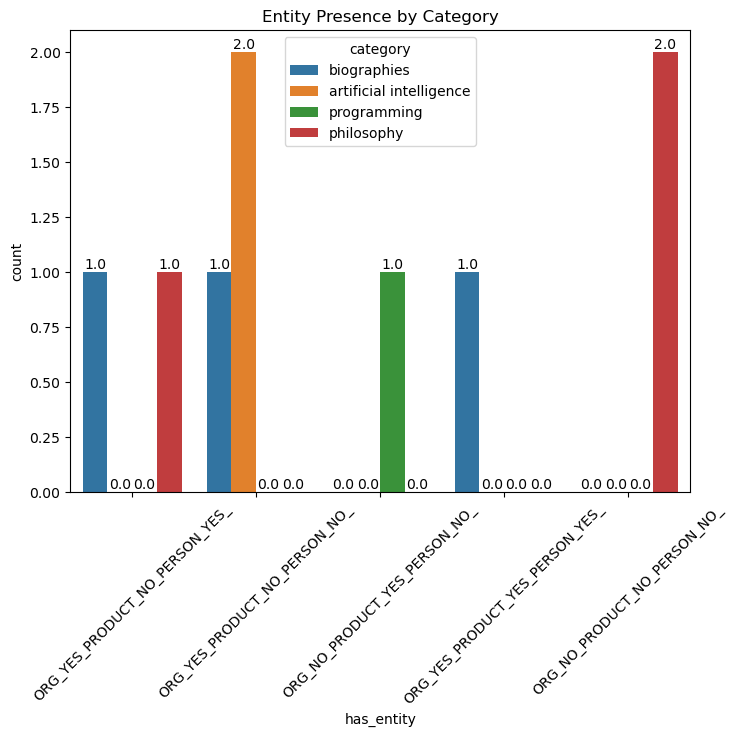

In [25]:
# Distribution of entity presence
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data1, x='has_entity', hue='category')
plt.title('Entity Presence by Category')
plt.xticks(rotation=45)

# Adding data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

Class Distribution:
category
biographies                3
philosophy                 3
artificial intelligence    2
programming                1
Name: count, dtype: int64


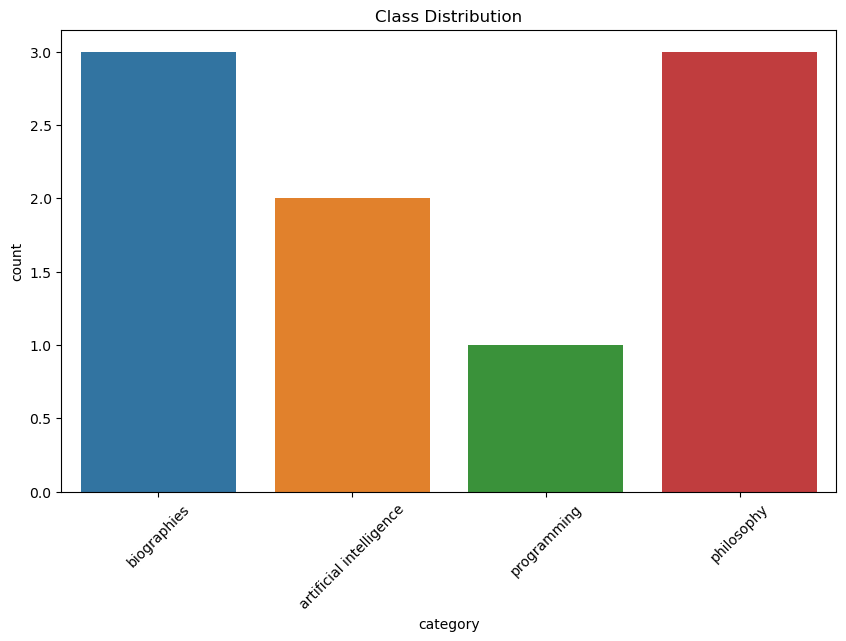

In [31]:
# Checking class distribution
print("Class Distribution:")
print(data1['category'].value_counts())

# Visualizing class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data1, x='category')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ensuring minimum number of samples per class
min_samples_per_class = 2

# Filtering out classes with fewer than the minimum required samples
filtered_data = data1.groupby('category').filter(lambda x: len(x) >= min_samples_per_class)

# Checking filtered class distribution
print("\nFiltered Class Distribution:")
print(filtered_data['category'].value_counts())

# Extracting features and labels
X = filtered_data['paragraph']
y = filtered_data['category']

# Encoding target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Ensuring test_size is large enough to include at least one sample per class
unique_classes = len(filtered_data['category'].unique())
total_samples = len(filtered_data)
test_size_proportion = max(0.2, unique_classes / total_samples)

# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=test_size_proportion, random_state=42, stratify=y_encoded)

# Verifying split class distribution
print("\nTrain set class distribution:")
print(pd.Series(y_train).value_counts())
print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts())



Filtered Class Distribution:
category
biographies                3
philosophy                 3
artificial intelligence    2
Name: count, dtype: int64

Train set class distribution:
2    2
1    2
0    1
Name: count, dtype: int64

Test set class distribution:
1    1
0    1
2    1
Name: count, dtype: int64


In [39]:
# Checking the filtered class distribution again
print("\nFiltered Class Distribution:")
print(filtered_data['category'].value_counts())


Filtered Class Distribution:
category
biographies                3
philosophy                 3
artificial intelligence    2
Name: count, dtype: int64


In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Createinga pipeline with TF-IDF and Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', MultinomialNB())
])

# Determining the appropriate number of splits (n_splits) for cross-validation

min_samples_per_class = filtered_data['category'].value_counts().min()
n_splits = min(5, min_samples_per_class)  # Use minimum of 5 or the smallest class size

# Performing k-fold cross-validation with stratified sampling
cv_scores = cross_val_score(pipeline, X, y_encoded, cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42))

print("\nCross-Validation Scores:")
print(cv_scores)
print("Mean Accuracy: ", cv_scores.mean())



Cross-Validation Scores:
[0.25 0.25]
Mean Accuracy:  0.25


In [46]:
import warnings
warnings.filterwarnings("ignore")


Classification Report:
                         precision    recall  f1-score   support

artificial intelligence       0.00      0.00      0.00         1
            biographies       0.50      1.00      0.67         1
             philosophy       0.00      0.00      0.00         1

               accuracy                           0.33         3
              macro avg       0.17      0.33      0.22         3
           weighted avg       0.17      0.33      0.22         3


Confusion Matrix:


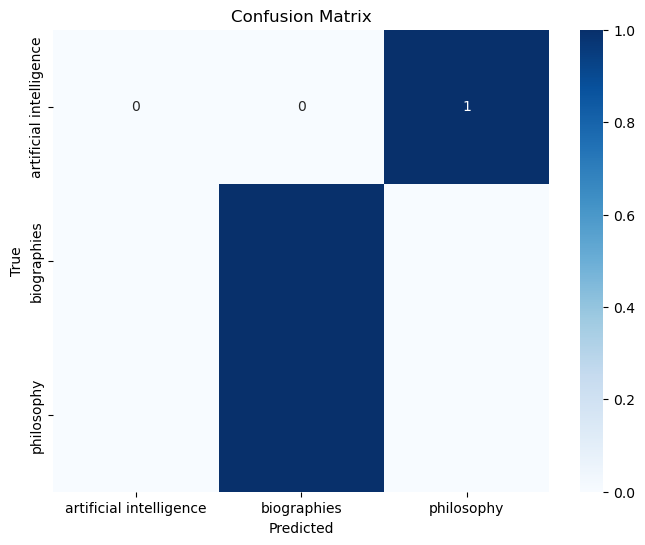

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initializing TF-IDF Vectorizer with expanded parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1, 3))

# Creating a pipeline with TF-IDF and Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', MultinomialNB(alpha=0.5))  # Adjusted alpha based on previous evaluation
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on test data
y_pred = pipeline.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initializing TF-IDF Vectorizer with appropriate parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1, 3))

# Fiting and transforming the vectorizer on  text data
X = tfidf_vectorizer.fit_transform(filtered_data['paragraph'])

# Extracting labels (y)
y = filtered_data['category']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold



# Initializing Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Defining parameter grid for GridSearchCV with more refined values
param_grid = {
    'n_estimators': [100, 200, 300],      # increase number of trees
    'max_depth': [None, 20, 30, 40],       # extend depth range
    'min_samples_split': [2, 5, 10, 15],   # include larger splits
    'min_samples_leaf': [1, 2, 3, 4]       # add smaller leaf sizes
}

# Using StratifiedKFold for classification tasks to ensure class balance in each fold
n_splits = min(5, len(y_train.value_counts()))  

# Initializing GridSearchCV with adjusted number of splits
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42),
                           scoring='accuracy', verbose=1, n_jobs=-1)

# Performing GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best Parameters found:")
print(grid_search.best_params_)
print("Best Cross-validation Accuracy: {:.2f}".format(grid_search.best_score_))


best_rf_model = grid_search.best_estimator_


Fitting 2 folds for each of 192 candidates, totalling 384 fits
Best Parameters found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.50


Test Set Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

 biographies       0.00      0.00      0.00         1
  philosophy       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



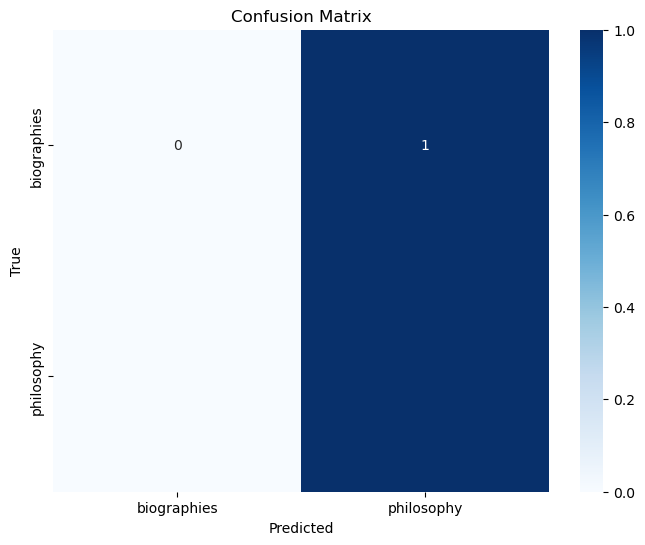

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Predicting on the test set with the best model found by GridSearchCV
y_pred = best_rf_model.predict(X_test)

# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.2f}".format(accuracy))

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Task 2: Text Clarity Classification Prototype

In [66]:
import pandas as pd

# Selecting a subset of data for labeling (100 data points)
subset_data = data1.head(100).copy()


subset_data.loc[:49, 'text_clarity'] = 'clear_enough'
subset_data.loc[50:99, 'text_clarity'] = 'not_clear_enough'

# Displaying the labeled subset for verification
print(subset_data[['paragraph', 'text_clarity']].head())


                                           paragraph  text_clarity
0  Ramsay was born in Glasgow on 2 October 1852. ...  clear_enough
1  It has been widely estimated for at least the ...  clear_enough
2  He went on to win the Royal Medal of the Royal...  clear_enough
3  The changes have altered many underlying assum...  clear_enough
4  After these novels were published, Disraeli de...  clear_enough


Test Set Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

clear_enough       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



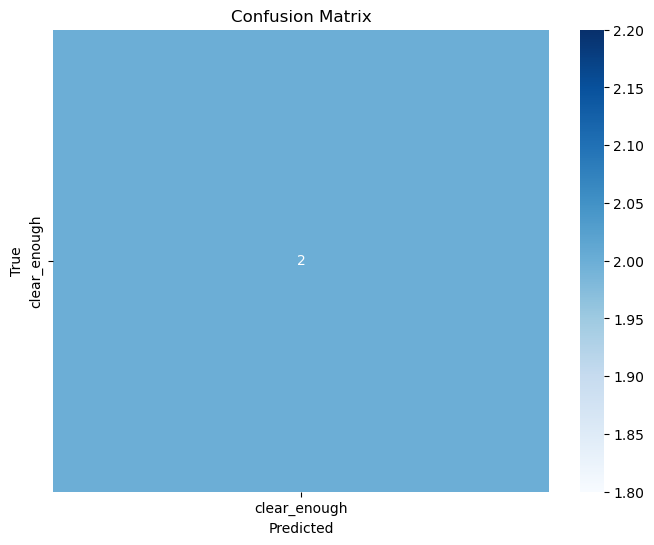

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting features and labels from the labeled subset
X = subset_data['paragraph']
y = subset_data['text_clarity']

# Initializing TF-IDF Vectorizer with appropriate parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1, 3))

# Fiting and transforming the vectorizer on the text data
X = tfidf_vectorizer.fit_transform(X)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initializing RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.2f}".format(accuracy))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Ploting confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
